# TP1: Análisis de datos MSAP (_**M**ethylation-**S**ensitive **A**mplified **P**olymorphism_)

> **Nota**: Este cuaderno asume que el [TP0](https://colab.research.google.com/github/VeronicaNoe/EpiEvo/blob/main/cuadernos/TP0_espacio_de_trabajo.ipynb) ha sido completado con éxito.


## Contenido

**Objetivo:** Familiarizarse con la identificación de fragmentos diferencialmente metilados utilizando datos MSAP de especies silvestres de papa ([Cara et al., 2019](https://nph.onlinelibrary.wiley.com/doi/full/10.1111/nph.15706)).



0.   [Preparación de cuaderno](#step-0)
1.   [Análisis de datos obtenidos por *MSAP*](#step-2)
  1.   [Introducción](#step-2.1)
  2.   [Análisis exploratorio de los datos](#step-2.2)
  3.   [Selección de alelos polimórficos](#step-2.3)
  4.   [Metilación global](#step-2.4)
  5.   [Comparación entre híbridos](#step-2.5)
2.   [OPCIONAL: Guardar en Drive](#step-3)



<a name="step-0"></a>
## Paso 0. Preparación del espacio de trabajo


In [ ]:
#@title Solicitar acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Preparar datos
%%bash
rm -r sample_data/ # eliminarmos la carpeta que está por default en colab

# Para trabajar de forma ordenada, se crearán 3 carpetas en colab:
# - *rawData*: en donde estarán los archivos necesarios para trabajar (**input**)
# - *results*: en donde se guardarán los archivos generados (**output**)
# - *plots*: en donde se guardarán los pdf de las figuras (**output**)
mkdir {rawData,plots,results}

# En el directorio *rawData* cargaremos los inputs
cp -r /content/drive/MyDrive/EpiEvo/epievo_data/1/* /content/rawData
ls rawData

commonFunctions.R
MSAP_Genemapper.csv


In [ ]:
#@title Cargar R
%load_ext rpy2.ipython

In [ ]:
#@title Instalar librerias
#@markdown **Nota**: La ejecución de esta celda puede tomar aproximadamente un minuto.
%%R
source(file.path("/content/rawData", "commonFunctions.R"))

R[write to console]: 
Attaching package: ‘plyr’


R[write to console]: The following objects are masked from ‘package:reshape’:

    rename, round_any




In [ ]:
#@title Establecer el directorio de trabajo
%%R
setwd("/content/results")
getwd()

[1] "/content/results"


<a name="step-2"></a>
## Paso 1. Análisis de datos obtenidos por *MSAP*

<a name="step-2.1"></a>
### Introducción

* Analizaremos la metilación del ADN en el híbrido natural *Solanum x rechei* y en las especies parentales *Solanum kurtzianum* y *Solanum microdontum*

* Luego la compararemos con la metilación del ADN en los híbridos sintéticos obtenidos por cruzamientos controlados.

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/1/figura.png" width="800"/> 
</p>




<a name="step-2.2"></a>
### Análisis exploratorio de los datos

In [ ]:
#@title Abrir la matriz de datos en R
%%R
Data <- read.csv("/content/rawData/MSAP_Genemapper.csv", header = TRUE, row.names = 1, check.names = FALSE)
numSamples<-nrow(Data)
numLoci<-ncol(Data)

#Vista previa de los datos
cat("Número de epiLoci=", numLoci,"\n")
cat("Número de muestras=", numSamples/2 ,"\n")
cat("\n","\t\t\t\t Vista previa de la tabla:", "\n")
Data[,1:5]

Número de epiLoci= 264 
Número de muestras= 15 

 				 Vista previa de la tabla: 
              1Allele 001 1Allele 002 1Allele 003 1Allele 004 1Allele 017
Hybrid_1_h              1           1           0           0           0
Hybrid_1_m              1           1           0           1           0
Hybrid_2_h              1           0           0           0           0
Hybrid_2_m              1           1           0           1           0
Hybrid_3_h              1           1           0           0           0
Hybrid_3_m              1           1           0           1           0
Hybrid_4_h              1           1           0           0           0
Hybrid_4_m              1           1           0           0           0
Hybrid_5_h              1           1           0           0           0
Hybrid_5_m              1           1           0           1           0
Kurtzianum_h            1           1           0           0           0
Kurtzianum_m            1     

Generamos la matriz de patrones de metilación (metilado o no metilado) comparando los patrones de amplificación en *_h* (HpaII/EcoRI) y *_m* (MspI/EcoRI).

<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/1/TP_01_A.png" width="500"/>
            <td style="padding:10px">
            </td>
        </tr>
    </table>
</div> 

In [ ]:
#@title Generar la matriz de patrones de metilación
%%R
MSAP_patterns<- matrix(nrow = dim(Data)[2], ncol = 0)
out<- c()
for (sample in 1:numSamples) if (sample %% 2 ==1){
  for (locus in 1:numLoci){
    out<- append(out, ifelse(Data[sample,locus]+Data[sample+1,locus]==0,'0', # en este caso, suma los valores de las fila sample y sample+1 en la columna loci
                      # si el test es falso, continua con la siguiente línea que es otro test
                      ifelse(Data[sample,locus]+Data[sample+1,locus]==2,'1',
                      # si el test es falso, termina con el 3
                      ifelse(Data[sample,locus]==1,'2','3'))))
  }
  MSAP_patterns<-cbind(MSAP_patterns,matrix(out,dimnames = list(colnames(Data),substr(row.names(Data)[sample],1,nchar(as.character(row.names(Data)[sample]))-2))))
  out<- c()
}

#Guardamos la matriz de patrones
write.csv(t(MSAP_patterns), file = "/content/results/MSAP_patterns.csv")

#Vista previa de los datos
cat("Número de epiLoci=", nrow(MSAP_patterns),"\n")
cat("Número de muestras=", ncol(MSAP_patterns),"\n")
cat("\n","\t\t\t\t Vista previa de la matriz de patrones:", "\n")
MSAP_patterns[1:10,1:7]

Número de epiLoci= 264 
Número de muestras= 15 

 				 Vista previa de la matriz de patrones: 
            Hybrid_1 Hybrid_2 Hybrid_3 Hybrid_4 Hybrid_5 Kurtzianum Microdontum
1Allele 001 "1"      "1"      "1"      "1"      "1"      "1"        "1"        
1Allele 002 "1"      "3"      "1"      "1"      "1"      "1"        "0"        
1Allele 003 "0"      "0"      "0"      "0"      "0"      "0"        "0"        
1Allele 004 "3"      "3"      "3"      "0"      "3"      "3"        "3"        
1Allele 017 "0"      "0"      "0"      "0"      "0"      "0"        "0"        
1Allele 029 "0"      "0"      "0"      "0"      "0"      "0"        "0"        
1Allele 030 "0"      "1"      "2"      "2"      "2"      "2"        "2"        
1Allele 035 "3"      "3"      "3"      "3"      "3"      "0"        "3"        
1Allele 041 "0"      "0"      "0"      "0"      "0"      "0"        "0"        
1Allele 042 "0"      "0"      "0"      "0"      "0"      "0"        "0"        


<a name="step-2.3"></a>
### Selección de alelos polimórficos


#### Generar variables dummies


* Para cada locus, una variable dummy es generada para representar el patrón de metilación.

* Una variable dummy es binaria: 0 ó 1 para indicar la ausencia o presencia de un patrón de metilación específico.

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/1/Figura_dummies.png" width="500"/> 
</p>



In [ ]:
#@title Generar variable dummy para cada patrón
%%R
dummies<- matrix(nrow = ncol(MSAP_patterns), ncol = 0)

for (locus in 1:numLoci){
  dummies <- cbind(dummies,
          matrix(as.numeric(MSAP_patterns[locus,] == 1), dimnames = list(colnames(MSAP_patterns), paste(row.names(MSAP_patterns)[locus],"1",sep = "_"))),
          matrix(as.numeric(MSAP_patterns[locus,] == 2), dimnames = list(colnames(MSAP_patterns), paste(row.names(MSAP_patterns)[locus],"2",sep = "_"))),
          matrix(as.numeric(MSAP_patterns[locus,] == 3), dimnames = list(colnames(MSAP_patterns), paste(row.names(MSAP_patterns)[locus],"3",sep = "_"))))
}
dummies[1:5,1:10]

         1Allele 001_1 1Allele 001_2 1Allele 001_3 1Allele 002_1 1Allele 002_2
Hybrid_1             1             0             0             1             0
Hybrid_2             1             0             0             0             0
Hybrid_3             1             0             0             1             0
Hybrid_4             1             0             0             1             0
Hybrid_5             1             0             0             1             0
         1Allele 002_3 1Allele 003_1 1Allele 003_2 1Allele 003_3 1Allele 004_1
Hybrid_1             0             0             0             0             0
Hybrid_2             1             0             0             0             0
Hybrid_3             0             0             0             0             0
Hybrid_4             0             0             0             0             0
Hybrid_5             0             0             0             0             0


#### Filtrar alelos

Solo los alelos polimórficos brindan información.

Descartaremos alelos que sean:
- **Singletons**: aquellos que están presentes en una sola muestra.
- **Monomorficos**: aquellos que están presentes en todas las muestras.

In [ ]:
#@title Filtrado y selección de alelos polimórficos
# Por cada alelo, vamos a sumar el número de muestras que presentan el alelo.
%%R
temp<-data.frame(colSums(dummies, dims=1))
colnames(temp)<-c("count")

# Definimos las variables
singletons<-1
monomorphic<-nrow(dummies)
toKeep<-subset(temp, c(count>singletons & count<monomorphic))
toKeep<-rownames(toKeep) #alelos polimorficos

#seleccionamos solo polimorficos de la matriz dummies
binary_matrix<-dummies[,toKeep]

# Guardamos la matriz binaria
write.csv(binary_matrix, file = "/content/results/MSAP_binary_matrix.csv")

# Vista previa de la matriz binaria
cat("Número de alelos monomórficos =", sum(temp$count==nrow(dummies)), "\n")
cat("Número de alelo singletons =", sum(temp$count==1), "\n")
#cat("Número de alelo nulo =", sum(temp$count<1), "\n")
cat("Número de alelo polimórficos =", dim(binary_matrix)[2], "\n")
cat("Número de alelo totales =", sum(temp$count>=1), "\n")
cat("Número de muestras =", nrow(binary_matrix), "\n")
cat("\n","\t\t\t\t Vista previa de la matriz binaria:", "\n")
binary_matrix[1:15,1:4]


Número de alelos monomórficos = 6 
Número de alelo singletons = 105 
Número de alelo polimórficos = 232 
Número de alelo totales = 343 
Número de muestras = 15 

 				 Vista previa de la matriz binaria: 
            1Allele 001_1 1Allele 001_3 1Allele 002_1 1Allele 003_1
Hybrid_1                1             0             1             0
Hybrid_2                1             0             0             0
Hybrid_3                1             0             1             0
Hybrid_4                1             0             1             0
Hybrid_5                1             0             1             0
Kurtzianum              1             0             1             0
Microdontum             1             0             0             0
Rechei_1                1             0             0             0
Rechei_2                0             1             0             1
Rechei_3                1             0             0             0
Rechei_4                1             0         

<a name="step-2.4"></a>
### Metilación global

In [ ]:
#@title Conteo de alelos metilados (*meth*) y no metilados (*unMeth*)
%%R
conteoPatrones<-f.count.methylation(binary_matrix)
head(conteoPatrones)
write.csv(conteoPatrones, file = "patrones.csv")
# Calculamos valores medios para cada categoría
summaryPatrones<-f.summary.patrones(conteoPatrones)
write.csv(summaryPatrones, file = "summary_Patrones.csv")

png 
  2 


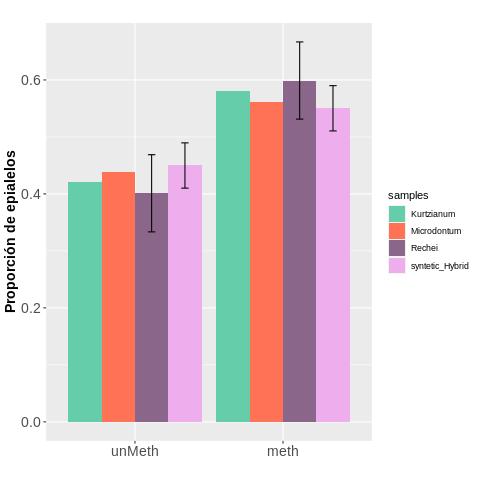

In [ ]:
#@title Gráfico
%%R
p<-ggplot(summaryPatrones,aes(x=variable,y=mean, fill=samples))+ geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
scale_fill_manual(values=c('aquamarine3', 'coral1', 'plum4', 'plum2')) +
labs(title="", x="", y = "Proporción de epialelos")+ theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))
plot(p)
pdf("/content/plots/methylation.pdf")
plot(p)
dev.off()

<a name="step-2.5"></a>

### Comparación entre híbridos

Los híbridos sintéticos serán comparados con los parentales (*S. kurtzianum* y *S. microdontum*) y con los híbridos naturales (*S.* x *rechei*) para determinar cuántos alelos comparten.

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/1/Figura_comparacion.png" width="800"/> 
</p>


In [ ]:
#@title Alelos comunes y únicos en el híbrido sintético
%%R
numAlleles<-ncol(binary_matrix) # Número de alelos
natHyb<-grep("Rechei", rownames(binary_matrix), value = TRUE) # S. x rechei (Híbrido natural)
synHyb<-grep("Hybrid", rownames(binary_matrix), value = TRUE) # Híbridos sintéticos

out<- c()
results<- matrix(nrow = 4, ncol = 0)

for (hyb in synHyb){
  for (allele in 1:numAlleles)
  {
    out<- append(out, ifelse(binary_matrix[hyb,allele]>0 & binary_matrix['Kurtzianum',allele]>0 & binary_matrix['Microdontum',allele]==0 & sum(binary_matrix[natHyb,allele])==0,'A',
                      ifelse(binary_matrix[hyb,allele]>0 & binary_matrix['Kurtzianum',allele]==0 & binary_matrix['Microdontum',allele]>0 & sum(binary_matrix[natHyb,allele])==0,'B',
                      ifelse(binary_matrix[hyb,allele]>0 & binary_matrix['Kurtzianum',allele]==0 & binary_matrix['Microdontum',allele]==0 & sum(binary_matrix[natHyb,allele])>0,'C',
                      ifelse(binary_matrix[hyb,allele]>0 & binary_matrix['Kurtzianum',allele]==0 & binary_matrix['Microdontum',allele]==0 & sum(binary_matrix[natHyb,allele])==0,'D','E')))))
   }                         
  
  results<-cbind(results,matrix(table(out, exclude = "E"),dimnames = list(c("Kurtzianum","Microdontum","Rechei","Unique"),hyb)))
  out<- c()
}  

## Transformamos los conteos en porcentajes 
percentages<-t(results)/colSums(results)*100
head(percentages)
## Save output to working directory
write.csv(percentages, file = "/content/results/MSAP_Hybrids.csv")

In [ ]:
#@title Cálculo de valores medios
%%R
percentagesToPlot<-melt(percentages)
colnames(percentagesToPlot)<-c("Hybrids","Especies","value")
summaryComparacion<-ddply(percentagesToPlot, c("Especies"), summarise,
               mean = mean(value),
               sd = sd(value))
write.csv(summaryComparacion, file = "ComparacionHibridos.csv")
summaryComparacion

     Especies     mean       sd
1  Kurtzianum 23.97483 4.852916
2 Microdontum 41.38850 6.365690
3      Rechei 15.12979 5.317959
4      Unique 19.50688 3.378486


png 
  2 


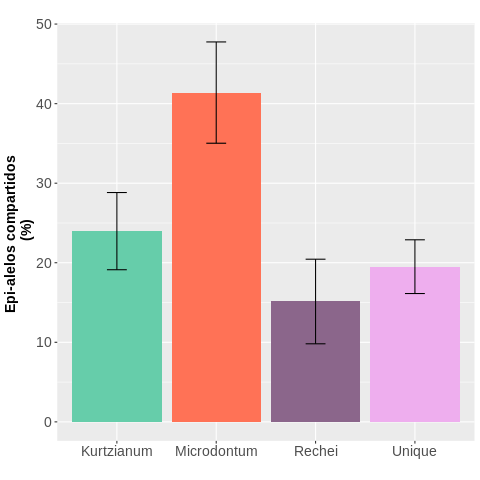

In [ ]:
#@title Gráfico
%%R
p<-ggplot(summaryComparacion,aes(x=Especies,y=mean, fill=Especies))+ geom_bar(stat="identity", position=position_dodge(), show.legend = F) +
geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
scale_fill_manual(values=c('aquamarine3', 'coral1', 'plum4', 'plum2')) +
labs(title="", x="", y = "Epi-alelos compartidos \n (%)")+ theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))
plot(p)
pdf("/content/plots/comparaciónHibridos.pdf")
plot(p)
dev.off()

<a name="step-3"></a>
## Paso 2. Guardar en Drive (OPCIONAL)


> **Nota:** Este paso es opcional. Si desea copiar los datos generados por este cuaderno en su Google drive, debe eliminar el numeral (`#`) de cada línea de código EXCEPTO la primera ``#@title`` en la celda de abajo.

In [ ]:
#@title Guardar archivos en el Drive personal
%%bash
#mkdir ../drive/MyDrive/EpiEvo/TP_1
#cd ..
#echo 'Usted está en:'
#pwd
#echo 'Lista de archivos en colab:'
#ls
#cp -r {plots,rawData,results} drive/MyDrive/EpiEvo/TP_1/
#echo 'Lista de archivos en TP_1 en su drive:'
#ls drive/MyDrive/EpiEvo/TP_1/